In [1]:
import lib.draw as draw
import lib.marking_evaluation as meval
import matplotlib.pyplot as plt
import numpy as np
import copy
from random import randint

In [ ]:
#TODO perhaps use a decreasing value for the change. this way -> faster changes in the beggining, slower in the end

In [2]:
def create_adversary(opposing_team):
    adversary = meval.Team()
    adversary.initialize_heuristic(w1=1, w2=1, w3=1, w4=1, mad=5)
    adversary.add_player(opposing_team[0][0], opposing_team[0][1], True)
    for player in opposing_team[1:]:
        adversary.add_player(player[0], player[1])
    return adversary

In [3]:
def create_team(team_coordinates):
    team = meval.Team()
    for player in team_coordinates:
        team.add_player(player[0], player[1]) 
    return team

In [4]:
def list_successors(current_proposal):
    successors = []
    for i in range(10):
        for j in range(2):
            for k in [-1, 1]:
                changed_proposal = copy.deepcopy(current_proposal)
                changed_proposal[i][j] += k
                successors.append(changed_proposal)
    return successors

In [5]:
def find_best(adversary, successors):
    best = successors[0]
    best_heuristic = adversary.calculate_heuristic(create_team(best))
    for successor in successors[1:]:
        successor_heuristic = adversary.calculate_heuristic(create_team(successor))
        if successor_heuristic > best_heuristic:
            best = successor
            best_heuristic = successor_heuristic
    return best, best_heuristic

In [6]:
def generate_random_start():
    # 16 to avoid starting inside the box
    return [[randint(16, 100), randint(0, 100)] for _ in range(10)]

In [7]:
def plot_proposed_team(adversary, current_proposal):
    proposed_team = create_team(current_proposal)
    adversary.calculate_heuristic(proposed_team)
    adversary.plot_result(proposed_team)

Iteration 1, HeuristicVal 1.8123967271205088
Iteration 2, HeuristicVal 1.8225422513822114
Iteration 3, HeuristicVal 1.8324943298237795
Iteration 4, HeuristicVal 1.9319118972577936
Iteration 5, HeuristicVal 1.9413138309024047
Iteration 6, HeuristicVal 1.950363680381252
Iteration 7, HeuristicVal 1.9594013290042467
Iteration 8, HeuristicVal 1.9682003354809292
Iteration 9, HeuristicVal 1.9756953539986593
Iteration 10, HeuristicVal 1.9839297188364953
Iteration 11, HeuristicVal 1.9913646641442682
Iteration 12, HeuristicVal 1.998855575314393
Iteration 13, HeuristicVal 2.007364639125797
Iteration 14, HeuristicVal 2.0147820057905323
Iteration 15, HeuristicVal 2.0226388645473103
Iteration 16, HeuristicVal 2.0307799501096753
Iteration 17, HeuristicVal 2.039231884207207
Iteration 18, HeuristicVal 2.0465950265312305
Iteration 19, HeuristicVal 2.153967433460986
Iteration 20, HeuristicVal 2.1613061391846644
Iteration 21, HeuristicVal 2.1685547536447216
Iteration 22, HeuristicVal 2.1771353627246075
It

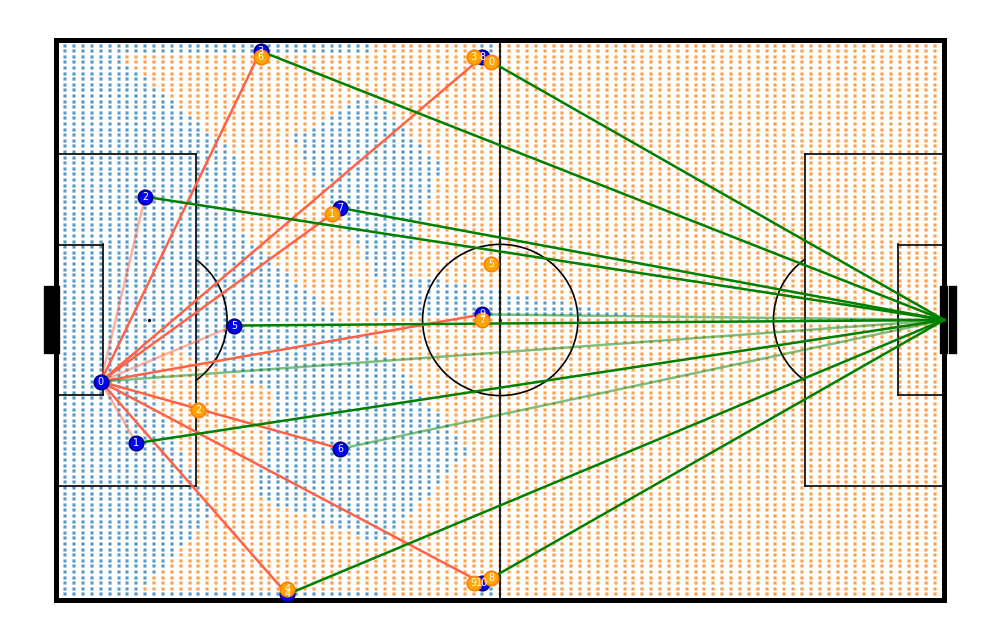

In [8]:
opposing_team = [(5, 39), (9, 28), (10, 72), (23, 98), (26, 1), (20, 49), (32, 27), (32, 70), (48, 97), (48, 51), (48, 3)]
adversary = create_adversary(opposing_team)
current_proposal = generate_random_start()
current_best_heuristic = adversary.calculate_heuristic(create_team(current_proposal))
c = 0
while 1:
    c += 1
    successors = list_successors(current_proposal)
    best, best_heuristic = find_best(adversary, successors)
    if best_heuristic < current_best_heuristic:
        break
    current_best_heuristic = best_heuristic
    current_proposal = best
    print(f'Iteration {c}, HeuristicVal {current_best_heuristic}')

plot_proposed_team(adversary, current_proposal)